# Import the pandas package. But nickname it 'pd' for short.

In [154]:
import pandas as pd

# Read a CSV (or TSV or anything!)

Here we are reading in a .tsv where the first column is "geneSymbol" and the second column is "chromosome"

In [155]:
pd.read_csv('../data/gene_chrom.tsv', sep='\t')

,geneSymbol,chromosome
0,DDX11L1,chr1
1,OR4F5,chr1
2,DQ597235,chr1
3,DQ599768,chr1
4,LOC100132062,chr1
5,LOC100133331,chr1
6,LOC388312,chr1
7,OR4F29,chr1
8,BC036251,chr1
9,M37726,chr1


We want to save it to a variable so that we can manipulate it in other ways and CHECK IT OUT!

In [156]:
gene_chrom_table = pd.read_csv('../data/gene_chrom.tsv', sep='\t')

# Check out your data! What are we working with here?

We can sneak a peek at just the first few rows...

In [157]:
gene_chrom_table.head()

,geneSymbol,chromosome
0,DDX11L1,chr1
1,OR4F5,chr1
2,DQ597235,chr1
3,DQ599768,chr1
4,LOC100132062,chr1


In [158]:
gene_chrom_table.head(2)

,geneSymbol,chromosome
0,DDX11L1,chr1
1,OR4F5,chr1


Or the last few rows...

In [159]:
gene_chrom_table.tail(3)

,geneSymbol,chromosome
30616,U7,chrX
30617,Mir_105,chrX
30618,U6,chrY


We can get a sense of the "shape" of the data...

In [160]:
gene_chrom_table.shape

(30619, 2)

^ This is what that means:

In [161]:
len(gene_chrom_table.columns)

2

In [162]:
len(gene_chrom_table)

30619

How about indexing into a row? 

In [163]:
gene_chrom_table[gene_chrom_table.geneSymbol == 'TP53']

,geneSymbol,chromosome
11939,TP53,chr17


You can also directly use the index number

In [164]:
gene_chrom_table.loc[11939]

geneSymbol     TP53
chromosome    chr17
Name: 11939, dtype: object

In [165]:
gene_chrom_table[gene_chrom_table.geneSymbol.isin(['TP53', 'BRCA1'])]

,geneSymbol,chromosome
11939,TP53,chr17
12301,BRCA1,chr17


# OK let's read in another file. This one is a bit trickier

This file, which can be found at ../data/chrom_lengths.tsv, is actually *space-separated* and does not yet have column labels.  

In [166]:
chrom_length_table = pd.read_csv('../data/chrom_lengths.tsv', sep=' ', names=['chrom', 'length'])
chrom_length_table.head()

,chrom,length
0,1,"249,698,942"
1,2,"242,508,799"
2,3,"198,450,956"
3,4,"190,424,264"
4,5,"181,630,948"


But! We have a problem. It looks like our lengths have actually been processed by pandas as strings instead of integers when they were loaded from the file. 

In [167]:
chrom_length_table.loc[0].length

'249,698,942'

Python is **not** happy when we try to treat this value as an integer and use it in a summation

In [168]:
chrom_length_table.loc[0].length + 1

TypeError: can only concatenate str (not "int") to str

# Apply magic

### So let's make a new column where we convert each of these values into integers so we can do fancy things like graph them. We're going to be using the "apply" construct, which basically means we are defining a function to process each row and do something to it, then return the result of all of those functions.

For each value, we're going to want to replace the commas in the string with an empty string...

In [169]:
'249,698,942'.replace(',', '')

'249698942'

Then convert them to integers!

In [170]:
int('249,698,942'.replace(',', ''))

249698942

Et voila! We can treat them like numbers now.

In [171]:
int('249,698,942'.replace(',', '')) + 58

249699000

### Okay so here's our function definition

In [172]:
# Here's our function that will be "applied" to each row
def turn_string_number_into_integer(row):
    # Access the length from this row...
    string_length = row.length
    # Convert the length into an integer...
    int_length = int(string_length.replace(',', ''))
    # And return the integer!
    return int_length
    

Now, when we "apply" the function to each row (note: axis=1 implies processing each row one at a time, otherwise the default is to process each column one at a time), we will be returned a new column with the function's results for each row!

In [173]:
chrom_length_table.apply(turn_string_number_into_integer, axis=1)

0     249698942
1     242508799
2     198450956
3     190424264
4     181630948
5     170805979
6     159345973
7     145138636
8     138688728
9     133797422
10    135186938
11    133275309
12    114364328
13    108136338
14    102439437
15     92211104
16     83836422
17     80373285
18     58617616
19     64444167
20     46709983
21     51857516
22    156040895
23     57264655
dtype: int64

And we have to make sure to save it back to our dataframe with a new name

In [174]:
chrom_length_table['numeric_length'] = chrom_length_table.apply(turn_string_number_into_integer, axis=1)

In [175]:
chrom_length_table.head()

,chrom,length,numeric_length
0,1,"249,698,942",249698942
1,2,"242,508,799",242508799
2,3,"198,450,956",198450956
3,4,"190,424,264",190424264
4,5,"181,630,948",181630948


Alright, we don't really need that old column anymore, do we? We can subset out just the columns we want to keep and save them into another dataframe object.

In [176]:
new_chrom_length_table = chrom_length_table[['chrom', 'numeric_length']]

In [177]:
new_chrom_length_table.head()

,chrom,numeric_length
0,1,249698942
1,2,242508799
2,3,198450956
3,4,190424264
4,5,181630948


Here's a useful pandas function you apply to this column now: 

In [178]:
new_chrom_length_table.numeric_length.mean()

128968693.33333333

Or you can get a plot of the lengths!

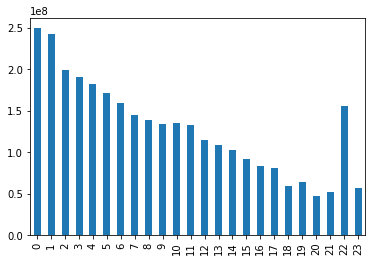

In [179]:
new_chrom_length_table.numeric_length.plot(kind='bar')

### but surprise surprise, it turns out that Pandas actually has a parameter built in to account for string conversion of numbers...

In [180]:
chrom_length_table = pd.read_csv('../data/chrom_lengths.tsv', sep=' ', names=['chrom', 'length'], thousands=',')
chrom_length_table.head()

,chrom,length
0,1,249698942
1,2,242508799
2,3,198450956
3,4,190424264
4,5,181630948


# Gene Density

<img src="../data/img/geneDensityArticle2020.png">

Okay, so now we have a table of genes mapped to chromosomes (*chrom_length_table*), and a table telling us how long each chromosome is (*gene_chrom_table*).
Let's try to calculate **gene density per chromosome**. We will want to figure out the total number of genes on each chromosome normalized by how long that chromosome is

# Group by

A reminder of what our *gene_chrom_table* table looked like:

In [181]:
gene_chrom_table.head()

,geneSymbol,chromosome
0,DDX11L1,chr1
1,OR4F5,chr1
2,DQ597235,chr1
3,DQ599768,chr1
4,LOC100132062,chr1


In [182]:
gene_count_by_chromosome = gene_chrom_table.groupby('chromosome').count()

You can do other things besides count, for example calculate the mean, variance, or standard deviation by group. Check out the documentation here to learn what else is possible: https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

So this is now a table where we have grouped by chromosome and gotten a total of how many rows are associated with that chromosome.

In [183]:
gene_count_by_chromosome.head()

,geneSymbol
chromosome,
chr1,2735
chr10,1162
chr11,1817
chr12,1382
chr13,566


And this is our table specifying lengths per chromosome:

In [184]:
chrom_length_table.head()

,chrom,length
0,1,249698942
1,2,242508799
2,3,198450956
3,4,190424264
4,5,181630948


### We want to put information both about the chromosome lengths and their gene counts into the same table. So we want to *join* information from both tables together into one table. To do this, we need to make sure that both tables have indices in the same format that can be cross-referenced.

<img src="../data/img/chromNamesRant.png">

#### Anyways, we have to make sure that the chromosome names have the same format in both of our tables so we can combine them.

In [185]:
def add_chr(r):
    return 'chr' + r.chrom


In [186]:
chrom_length_table['chromosome'] = chrom_length_table.apply(add_chr, axis=1)

In [188]:
chrom_length_table.head()

,chrom,length,chromosome
0,1,249698942,chr1
1,2,242508799,chr2
2,3,198450956,chr3
3,4,190424264,chr4
4,5,181630948,chr5


### And now, we can join the two tables on the "chromosome" column!

In [190]:
joined_table = chrom_length_table.join(gene_count_by_chromosome, on='chromosome')

In [195]:
joined_table

,chrom,length,chromosome,geneSymbol
0,1,249698942,chr1,2735
1,2,242508799,chr2,1763
2,3,198450956,chr3,1484
3,4,190424264,chr4,1068
4,5,181630948,chr5,1233
5,6,170805979,chr6,1574
6,7,159345973,chr7,1469
7,8,145138636,chr8,1004
8,9,138688728,chr9,1237
9,10,133797422,chr10,1162


# Column-wise operations

To calculate the gene density, we want to divide the number of genes by the number of bp in each chromosome. We can use pandas' column-wise operpations to do the job!

In [196]:
joined_table['geneDensity'] = joined_table.geneSymbol / joined_table.length

Let's all set the overall dataframe's index to be the chromosome name

In [200]:
joined_table.index = joined_table['chromosome']

# This does the same thing as:

joined_table.index = joined_table.chromosome

In [201]:
joined_table.head()

,chrom,length,chromosome,geneSymbol,geneDensity
chromosome,,,,,
chr1,1,249698942,chr1,2735,0.000011
chr2,2,242508799,chr2,1763,0.000007
chr3,3,198450956,chr3,1484,0.000007
chr4,4,190424264,chr4,1068,0.000006
chr5,5,181630948,chr5,1233,0.000007


# And let's plot these densities now to get a sense of how gene density varies across the genome

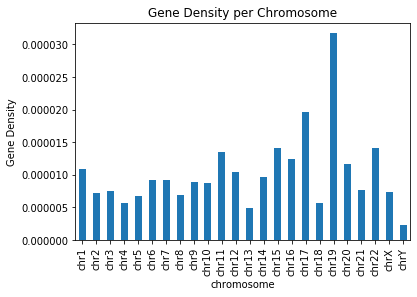

In [205]:
from matplotlib import pyplot as plt

plt.title('Gene Density per Chromosome')
plt.ylabel("Gene Density")
joined_table.geneDensity.plot(kind='bar')